**k-Means Clustering Algorithm**

In [55]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [56]:
#Loading the dataset
df = pd.read_csv('stock_data.csv')
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


**Data Preprocessing**

1. Dropping Categorical Features:

Since, in clustering we calculate the distances (EUclidean) between the dat points, we work directly with the numerical features only,as One-hot Encoding the categorical features might affect the clustering results.

2. Handling Missing Values

3. Standardizing:

Transforming the data so that each feature has mean=0 and variance=1.

It is an importnat step for k-Means, where we use distance calcualtions so that all feature contribute equally.

In [57]:
#Dropping categorical features
drop_cols = ['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry']
df = df.drop(columns=drop_cols)
df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [58]:
# Converting all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')
df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [59]:
#Handling missing values
df = df.fillna(df.mean())
df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [60]:
# Standardizing the features (mean=0. variance=1)
X = df.values
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

In [61]:
df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


**NOTE**: Since, it is an unsupervised learning, in clustering we do not go for spltting the train and test dataset, since the data is unlabeled there is no target variable to predict.

**k-Means Clutering Implementation**

We have defined the k-Means class, where we set k value.

Choosing the right value for **k** is a very important step in k-Means.

We use **Elbow Method** for the same.(To know more fo to the README file)

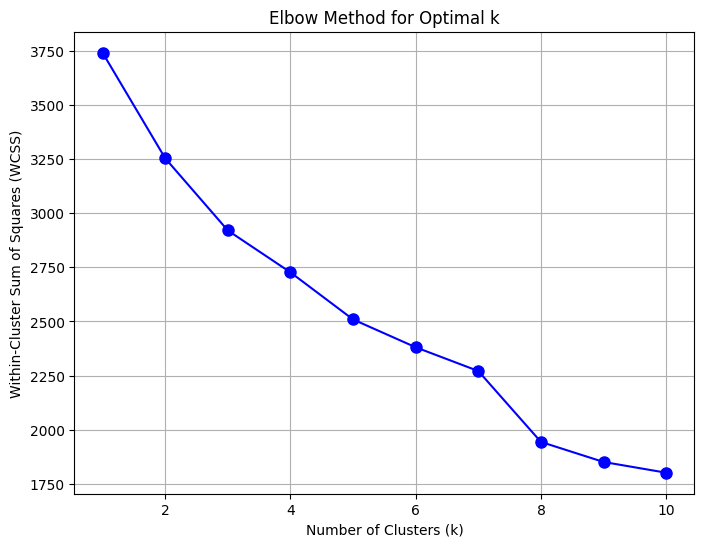

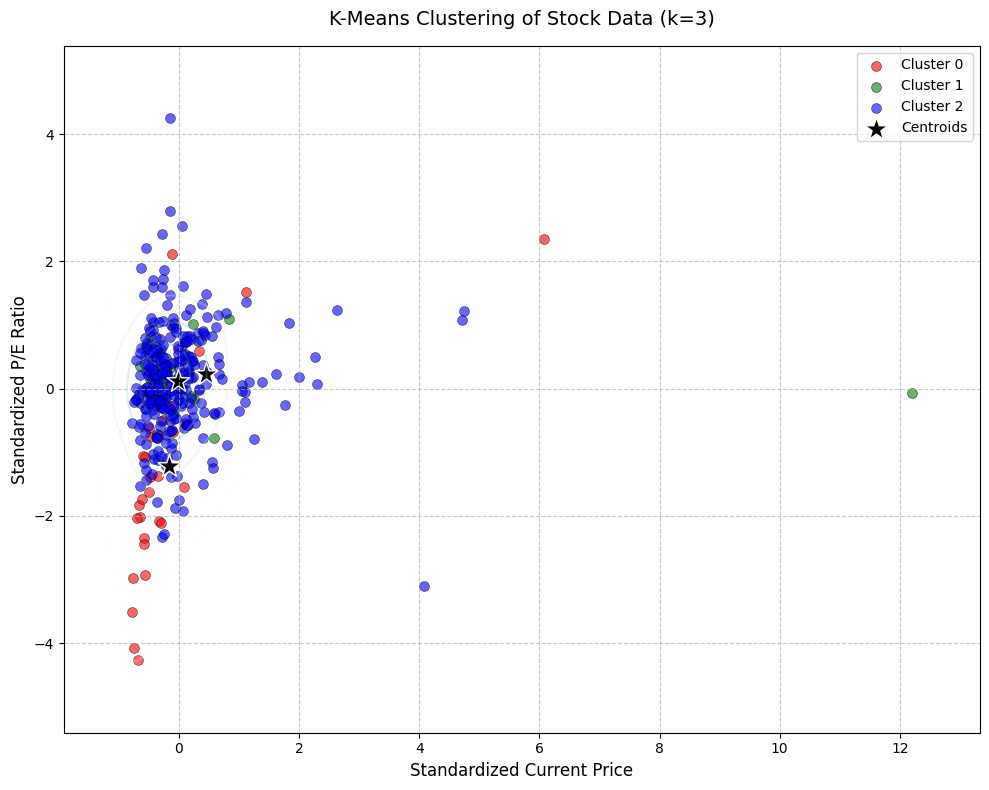

In [62]:
# k-Means Class defined here
class K_Means:

    # Initializing all the parameters
    def __init__(self, k=3, tolerance=0.001, max_iter=500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iter
        self.centroids = {} # Dictonaries to store centroids and classes
        self.classes = {}

    # Defining the Euclidean distance formula
    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)


    #Fitting the k-Means model to the data
    def fit(self, data):
        np.random.seed(42)
        random_indices = np.random.choice(len(data), self.k, replace=False)
        for i in range(self.k):
            self.centroids[i] = data[random_indices[i]]

        for i in range(self.max_iterations):
            self.classes = {j: [] for j in range(self.k)}
            # Assigning each data point to the intitial centroids of the dataset
            for point in data:
                distances = [self.euclidean_distance(point, self.centroids[idx]) for idx in self.centroids]
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            previous_centroids = dict(self.centroids)
            for cluster_index in self.classes:
                if len(self.classes[cluster_index]) > 0:
                    self.centroids[cluster_index] = np.mean(self.classes[cluster_index], axis=0)
                else:
                    self.centroids[cluster_index] = data[np.random.choice(len(data))]

            is_optimal = True
            for centroid in self.centroids:
                original_centroid = previous_centroids[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid) / (original_centroid + 1e-8) * 100.0) > self.tolerance:
                    is_optimal = False
            if is_optimal:
                break
    # Computing the k value with Within-CLuster Sum of Squares(WCSS) for the Elboe method
    def compute_wcss(self, data):
        wcss = 0  #Initialize WCSS to 0
        for cluster_index in self.classes:
            if len(self.classes[cluster_index]) > 0:
                cluster_points = np.array(self.classes[cluster_index])
                centroid = self.centroids[cluster_index]
                wcss += np.sum((cluster_points - centroid) ** 2)
        return wcss
#Function to plot the clusters with improved visualization
def plot_clusters_improved(k_means, X, k):
    plt.figure(figsize=(10, 8))
    colors = ['red', 'green', 'blue', 'cyan', 'magenta']
    for cluster_index in k_means.classes:
        if len(k_means.classes[cluster_index]) > 0:
            cluster_points = np.array(k_means.classes[cluster_index])
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                        c=colors[cluster_index % len(colors)], s=50, alpha=0.6,
                        label=f'Cluster {cluster_index}', edgecolor='k', linewidth=0.5)
#Plotting centroids with a distinct marker
    for centroid in k_means.centroids:
        plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1],
                    c='black', marker='*', s=300, label='Centroids' if centroid == 0 else "",
                    edgecolor='white', linewidth=1)

    sns.kdeplot(x=X[:, 0], y=X[:, 1], cmap="Blues", alpha=0.3, levels=5)
    plt.xlabel('Standardized Current Price', fontsize=12)
    plt.ylabel('Standardized P/E Ratio', fontsize=12)
    plt.title(f'K-Means Clustering of Stock Data (k={k})', fontsize=14, pad=15)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Elbow Method to Confirm Optimal k
k_range = range(1, 11)
wcss = []
for k in k_range:
    k_means = K_Means(k=k)
    k_means.fit(X)
    wcss.append(k_means.compute_wcss(X))
#Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# K-Means Clustering with Optimal k
optimal_k = 3  # Based on the elbow plot
k_means = K_Means(k=optimal_k)
k_means.fit(X)

# Plot the Clusters
plot_clusters_improved(k_means, X, optimal_k)


Obcervation:

**Plot 1**: Cluster Curve Plot

The Elbow plot , shows k=3 as the optimal number of clusters for the dataset, since we can see a noticeable bend in the curver at k=3.



**Plot 2**: k-Means Clustering plor for the dataset

1. *Blue Clusters* represents, most stocks have moderate prices, indicates the central tendency in the dataset.

2. *Green Cluster* represents the small subset of high-price stocks, mainly driven by outliers (e.g., PCLN, NFLX).

3. *Red Clusters* shows the undervalued stocks with lower prices and P/E ratios.

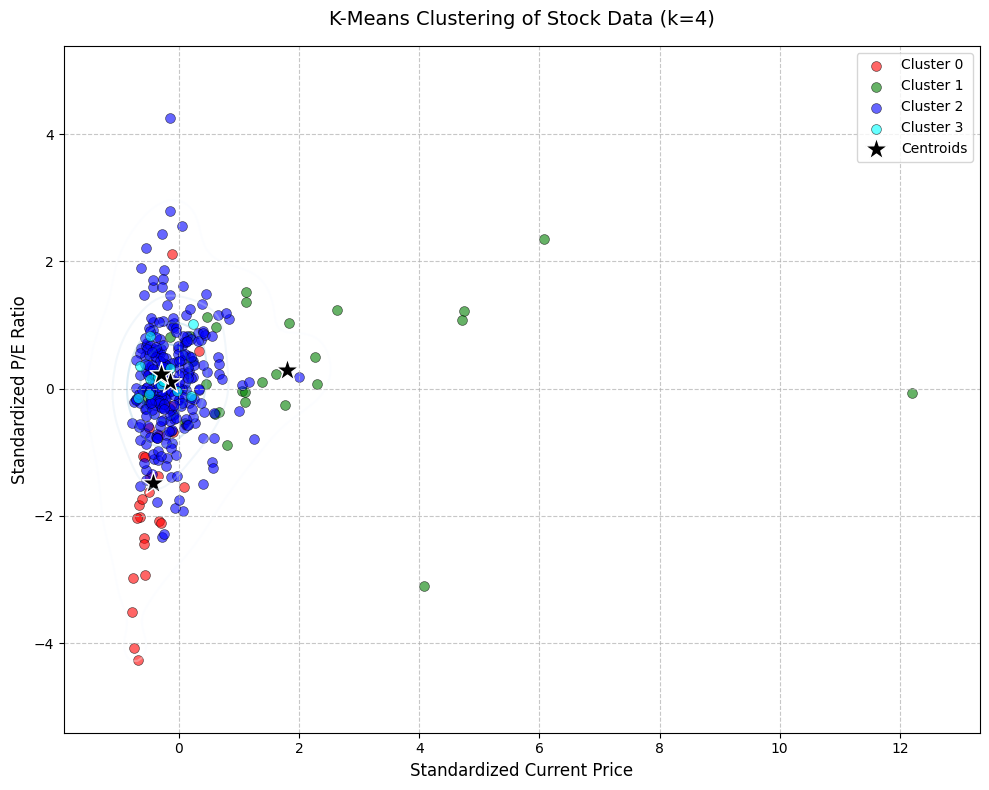

In [63]:
#Plotting for k=4 clusters
k = 4
k_means = K_Means(k=k)
k_means.fit(X)
plot_clusters_improved(k_means, X, k)

Observation:

1. Cluster 0 (Red) is distinct from the others due to its low P/E and price values.

2. Cluster 2 (Blue) and Cluster 1 (Green) overlap slightly in the central region, but the centroids have differnt cetners.

3. Cluster 3 (Cyan) is well-separated due ot its high prices, at soe points near the origin it overlaps with other clusters.